In [ ]:
import pandas as pd
import requests
import io
import os
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
url = "https://raw.githubusercontent.com/jerrywu2013/Hiskio_data/master/Creditcard.csv"
s = requests.get(url).content
creditcard = pd.read_csv(io.StringIO(s.decode('utf-8')))
df = creditcard

In [ ]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#col_data = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX',
#       'CREDIT_LIMIT','PAYMENTS']
col_data = ['BALANCE', 'BALANCE_FREQUENCY', 'INSTALLMENTS_PURCHASES','ONEOFF_PURCHASES_FREQUENCY']
km_pd = pd.DataFrame(df[col_data])

In [ ]:
NoNA_km_pd = km_pd.dropna()

# K-平均法(K-Means Clustering)

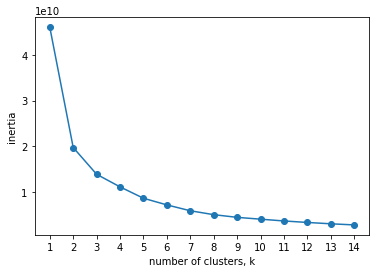

In [ ]:
#找尋適合的群數
import matplotlib.pyplot as plt

ks = range(1, 15)
inertias = []

for k in ks:

    km = KMeans(n_clusters=k)
    km.fit(NoNA_km_pd)
    inertias.append(km.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [ ]:
#訓練模型
km = KMeans(n_clusters=14)
km.fit(NoNA_km_pd)
km.labels_

array([9, 3, 3, ..., 9, 9, 9], dtype=int32)

In [ ]:
#將分出來的集群置入原本的資料
NoNA_km_pd['Cluster'] = km.labels_
NoNA_km_pd

,BALANCE,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,Cluster
0,40.900749,0.818182,95.40,0.000000,9
1,3202.467416,0.909091,0.00,0.000000,3
2,2495.148862,1.000000,0.00,1.000000,3
3,1666.670542,0.636364,0.00,0.083333,13
4,817.714335,1.000000,0.00,0.083333,0
...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.000000,9
8946,19.183215,1.000000,300.00,0.000000,9
8947,23.398673,0.833333,144.40,0.000000,9
8948,13.457564,0.833333,0.00,0.000000,9


In [ ]:
#計算評分
from sklearn import metrics
metrics.calinski_harabasz_score(NoNA_km_pd, km.labels_) 

10956.711712066075

In [ ]:
#進行集群預測
km.predict(km_pd[0:2])

array([9, 3], dtype=int32)

# 階層法(Hierarchical clustering)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hclust = AgglomerativeClustering(n_clusters=3)

hclust.fit(NoNA_km_pd)
cluster_labels = hclust.labels_
print(cluster_labels)


[0 2 0 ... 0 0 0]


In [ ]:
#接近1為階層表現良好
silhouette_avg = metrics.silhouette_score(NoNA_km_pd, cluster_labels)
print(silhouette_avg)

0.5595826227065822
